In [3]:
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
# from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
imagegen = ImageDataGenerator()
import matplotlib.pyplot as plt

In [29]:
leaf_status = ["Apple - Apple Scab", "Apple - Black Rot", "Apple - Cedar Apple Rust", "Apple - Healthy", "Blueberry - Healthy", "Cherry - Powdery Mildew", "Cherry - Healthy", "Corn(Maize) - Cercospora Leaf Spot(Gray Leaf Spot)", "Corn(Maize) - Common Rust", "Corn(Maize) - Northern Leaf Blight", "Corn(Maize) - Healthy", "Grape - Black Rot", "Grape - Esca(Black Measles)", "Grape - Leaf Blight(Isariopsis Leaf Spot)", "Grape - Healthy", "Orange - Haunglongbing(Citrus Greening)", "Peach - Bacterial Spot", "Peach - Healthy", "Bell Pepper - Bacterial Spot", "Bell Pepper - Healthy", "Potato - Early Blight", "Potato - Late Blight", "Potato - Healthy", "Raspberry - Healthy", "Soybean - Healthy", "Squash - Powdery Mildew", "Strawberry - Leaf Scorch", "Strawberry - Healthy", "Tomato - Bacterial Spot", "Tomato - Early Blight", "Tomato - Late Blight", "Tomato - Leaf Mold", "Tomato - Septoria Leaf Spot", "Tomato - Spider Mites(Two Spotted Spider Mite)", "Tomato - Target Spot", "Tomato - Yellow Leaf Curl Virus", "Tomato - Mosaic Virus", "Tomato - Healthy"]

In [4]:
train = imagegen.flow_from_directory("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(50, 50))
val = imagegen.flow_from_directory("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(50, 50))

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
# test = imagegen.flow_from_directory("/kaggle/input/new-plant-diseases-dataset/test/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(50, 50))

In [6]:
pre_trained_model = tf.keras.applications.EfficientNetV2S(input_shape=(50, 50, 3), include_top=False, weights="imagenet")

82420632/82420632 [==============================] - 1s 0us/step


In [7]:
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

input_1
rescaling
stem_conv
stem_bn
stem_activation
block1a_project_conv
block1a_project_bn
block1a_project_activation
block1a_add
block1b_project_conv
block1b_project_bn
block1b_project_activation
block1b_drop
block1b_add
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block2c_expand_conv
block2c_expand_bn
block2c_expand_activation
block2c_project_conv
block2c_project_bn
block2c_drop
block2c_add
block2d_expand_conv
block2d_expand_bn
block2d_expand_activation
block2d_project_conv
block2d_project_bn
block2d_drop
block2d_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_project_conv
block3a_project_bn
block3b_expand_conv
block3b_expand_bn
block3b_expand_activation
block3b_project_conv
block3b_project_bn
block3b_drop
block3b_add
block3c_expand_conv
block3c_expand_bn
block3c_expand_

In [8]:
last_layer = pre_trained_model.get_layer('block6o_add')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(38, activation='sigmoid')(x)

In [9]:
model = tf.keras.Model(pre_trained_model.input, x)

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'], run_eagerly=True)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 50, 50, 3)    0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 25, 25, 24)   648         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 25, 25, 24)   96          ['stem_conv[0][0]']              
                                                                                              

In [20]:
enet_classifier = model.fit(train, steps_per_epoch=(2520//32), epochs = 64, validation_data=val, validation_steps=(33//32), batch_size = 32, verbose = 1)

Epoch 1/64
78/78 [==============================] - 53s 679ms/step - loss: 1.2652 - accuracy: 0.5877 - val_loss: 0.4303 - val_accuracy: 0.8125
Epoch 2/64
78/78 [==============================] - 52s 665ms/step - loss: 1.2851 - accuracy: 0.5837 - val_loss: 0.4586 - val_accuracy: 0.8750
Epoch 3/64
78/78 [==============================] - 52s 671ms/step - loss: 1.3203 - accuracy: 0.5701 - val_loss: 0.6089 - val_accuracy: 0.9062
Epoch 4/64
78/78 [==============================] - 52s 663ms/step - loss: 1.2858 - accuracy: 0.5845 - val_loss: 0.5242 - val_accuracy: 0.7812
Epoch 5/64
78/78 [==============================] - 53s 678ms/step - loss: 1.2684 - accuracy: 0.5970 - val_loss: 0.6887 - val_accuracy: 0.7188
Epoch 6/64
78/78 [==============================] - 52s 668ms/step - loss: 1.2647 - accuracy: 0.5893 - val_loss: 0.8909 - val_accuracy: 0.6875
Epoch 7/64
78/78 [==============================] - 52s 671ms/step - loss: 1.2879 - accuracy: 0.5861 - val_loss: 0.8838 - val_accuracy: 0.7500

In [13]:
# model.save('EfficientNetV2S_Marine_Classifier.h5')
# model = load_model('EfficientNetV2S_Marine_Classifier.h5')

In [14]:
# result = model.evaluate(test, batch_size=32)
# print("[Loss, Accuracy] = ", result)

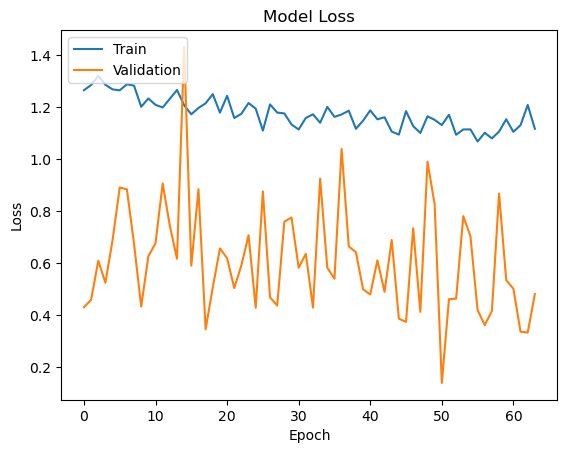

In [21]:
plt.plot(enet_classifier.history['loss'])
plt.plot(enet_classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

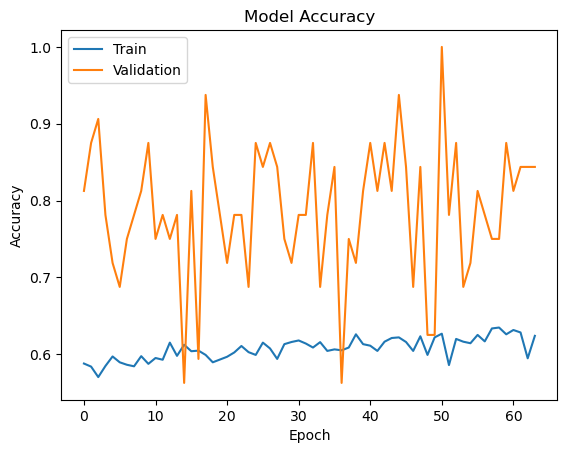

In [22]:
plt.plot(enet_classifier.history['accuracy'])
plt.plot(enet_classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
test_img = '/kaggle/input/test-image/test_image.jpeg'

In [32]:
test = cv2.imread(test_img)
test = cv2.resize(test, (50, 50))
test = np.array(test)
test = np.expand_dims(test, axis=0)
print("Shape of Validation Data: ", test.shape)
pred = model.predict(test)

Shape of Validation Data:  (1, 50, 50, 3)
1/1 [==============================] - 0s 270ms/step


In [33]:
op = []
pred = np.array(pred.tolist())[0]
index = pred.tolist().index(max(pred))
# print(index)
# print("Input Test Image falls under the Category:", pred_img(index))
print("Input Test Image falls under the Category:", leaf_status[index])
print("Accuracy = ", max(pred))

Input Test Image falls under the Category: Apple - Cedar Apple Rust
Accuracy =  0.9999841451644897
